# Setting up query parameters
Setting up time range, mean window size

In [50]:
import datetime

# 2024-10-31 00:00:00 using UTC timezone
srt = datetime.datetime(2024, 10, 31, 0, 0, 0, 0, datetime.timezone.utc)
# 2024-10-31 01:00:00 UTC
end = datetime.datetime(2024, 10, 31, 1, 0, 0, 0, datetime.timezone.utc)
window = datetime.timedelta(hours=0, minutes=0, seconds=1, microseconds=0)


# Initializing an InfluxDB Client

Setting up basic parameter for influxDB client. 

In [51]:
from influxdb_client import InfluxDBClient
import warnings

# Initialize the InfluxDB client
token = "fP-GBq8Z1wZE7iW8qFBuxVy-ArVP9TqVec0naJ77XLECiwSr82aRXqvo3ylXZqU_2ad2vxWGcMoMbl3PXqAZ7A=="
server_url = "http://140.112.12.62:8086"
client = InfluxDBClient(url=server_url, token=token)
org = "NTUCE"
query_api = client.query_api()

# Disable influxdb pivot warning
import warnings
from influxdb_client.client.warnings import MissingPivotFunction
warnings.simplefilter("ignore", MissingPivotFunction)

### Query general weather parameters from Ultrasonic3D.
There will be two array `time` and `vectors`.
* `time` is a 1-D array of epoch time in second.
* `vectors` is a 3-D array of wind-vectors, the content of element is `(x, y, z)`.

In [52]:
# Get visibility data
with open("flux/wind3d_vector.flux") as fluxfile:
    vectors_query = fluxfile.read()
    vectors_query = vectors_query.format(start = srt.isoformat(), end = end.isoformat(), window = f"{int(window.total_seconds()*1e9)}ns")
    vectors_df = query_api.query_data_frame(org="NTUCE", query = vectors_query)
    vectors_df.drop(columns=["result", "table"], inplace=True)
    vectors_df.set_index("_time", inplace=True)

time = vectors_df.index.to_numpy()
vectors = vectors_df.to_numpy()

# Plotting the result

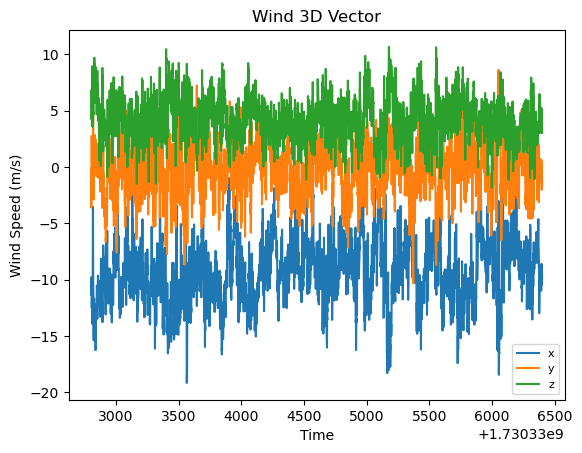

In [56]:
import matplotlib.pyplot as plt
xv, yv, zv = vectors[:,0], vectors[:,1], vectors[:,2]
fig = plt.figure()
plt.plot(time, xv, label="x")
plt.plot(time, yv, label="y")
plt.plot(time, zv, label="z")
plt.title("Wind 3D Vector")
plt.xlabel("Time")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.show()